In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from os.path import exists
import numpy as np
import seaborn as sns
from helper_functions import *
import matplotlib.pylab as plt

c:\Users\sophi\Miniconda3\envs\MT\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Processing Data

Process the data so that it can be visualized nicely.

In [3]:
occ_list = import_occupations("data/occupations_updated.csv")
frame = pd.DataFrame(columns=['occupation', 'total', 'male', 'female'])
total_frame = pd.DataFrame()
for occupation in occ_list:
        name = occupation[0]
        occ_file = 'data/dataframes_cleaned/' + name + '.csv'
        df = pd.read_csv(occ_file)
        #count amount of each gender
        values = df['gender'].value_counts()
        dic = {'occupation' : name, 'total' : [len(df)]}
        for gender, amount in values.iteritems():
                dic[gender] = [amount]
        frame2 = pd.DataFrame.from_dict(dic)
        frame = pd.concat([frame, frame2], ignore_index=True, axis=0)
        #add occupation column to original df and append to a big df with all data
        df['occupation'] = name
        total_frame = pd.concat([total_frame, df], ignore_index=True)
frame = frame.fillna(0)
#print(frame)
frame['occupation'].to_csv('data/occupations.csv', index=False)
frame[['occupation', 'total']].to_csv('data/occupations_total.csv')

In [4]:
sorted = frame.sort_values(by=['total'], ignore_index=True)
reduced = sorted[sorted['total'] >= 2500]
print(reduced['occupation'])
print(reduced.reset_index(drop=True))
reduced['occupation'].to_csv('data/occupations_subset.csv', index=False)

27    fashion_designer
28               nurse
29          magistrate
30       industrialist
31          cartoonist
32           policeman
33               coach
34            wrestler
35           violinist
36           geologist
37            lyricist
38     cinematographer
39              dancer
40              banker
41       civil_servant
42              farmer
43               boxer
44           guitarist
45              priest
46           sportsman
47       mathematician
48              jurist
49          footballer
50            diplomat
51           historian
52              lawyer
53              singer
54               actor
Name: occupation, dtype: object
          occupation   total    male  female  diverse
0   fashion_designer    2534    1144    1388      2.0
1              nurse    2726     252    2472      2.0
2         magistrate    2778    2636     142      0.0
3      industrialist    2779    2738      41      0.0
4         cartoonist    2889    2336     549      4.0


Visualize the total amount of datapoints for each occupation to emphasize where the most data is accessible.

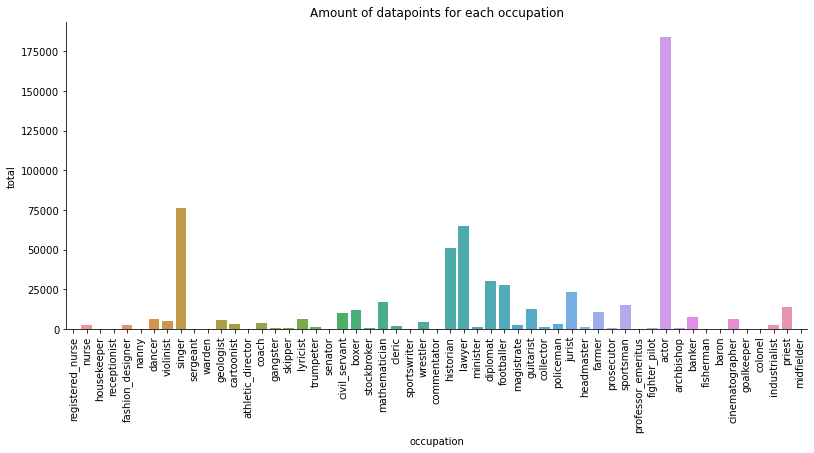

In [5]:
graph = sns.catplot(data=frame, x='occupation', y='total', kind='bar', aspect=7/3)
plt.title('Amount of datapoints for each occupation')
plt.xticks(rotation=90)
plt.show()

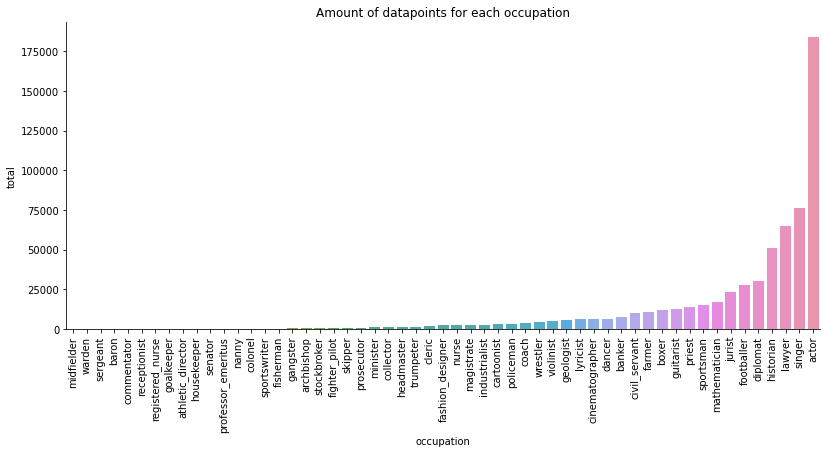

In [6]:
#distribution of datapoints
graph = sns.catplot(data=frame.sort_values(by=['total']), x='occupation', y='total', kind='bar', aspect=7/3)
plt.title('Amount of datapoints for each occupation')
plt.xticks(rotation=90)
plt.show()

Visualize the distribution of the genders for each occupation. This gives a first impression of gender distributions in each occupation based on real/historical context.

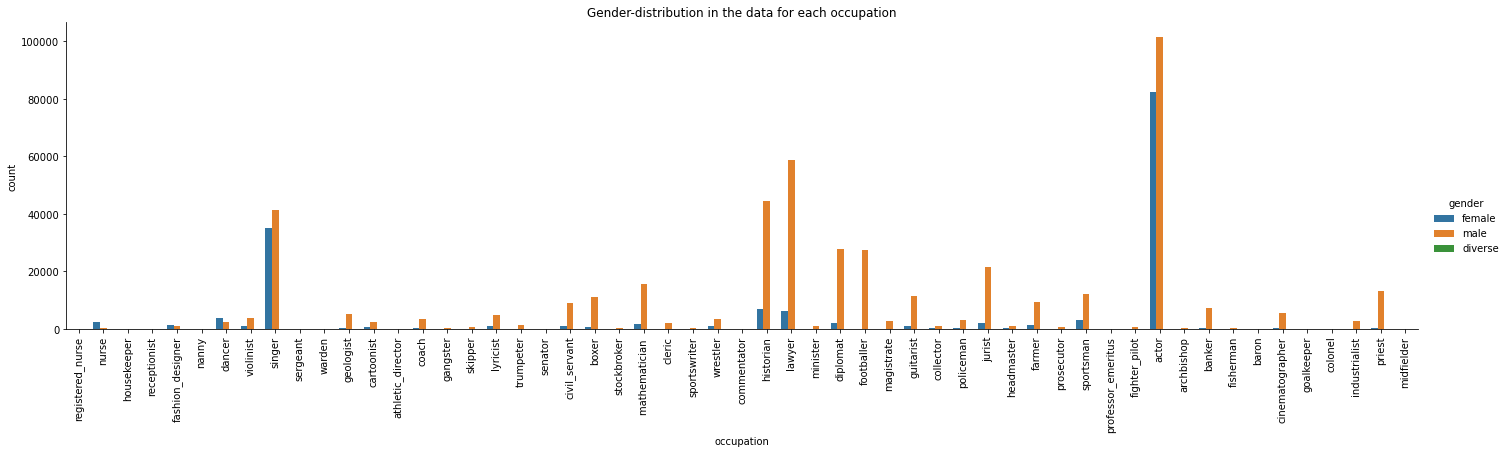

In [26]:
sns.catplot(data=total_frame, x='occupation', hue='gender', kind='count', aspect=4/1)
plt.title('Gender-distribution in the data for each occupation')
plt.xticks(rotation=90)
plt.show()

### Find deleted Occupations (from processing)

In [27]:
occ_list_old = import_occupations("data/occupations.csv")
for occ in occ_list_old:
    if occ not in occ_list:
        print(occ)

['counselor' 'Q5783638']
['marshal' 'Q15879178']
['infielder' 'Q1147776']
['solicitor_general' 'Q7557772']
